In [2]:
import pandas as pd 
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)



In [4]:
#the names of all columns in the data
print(nba.columns.values)

['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


In [5]:
#check for null values
nba.isnull().any()

player          False
pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
fg.              True
x3p             False
x3pa            False
x3p.             True
x2p             False
x2pa            False
x2p.             True
efg.             True
ft              False
fta             False
ft.              True
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
season          False
season_end      False
dtype: bool

In [7]:
#check for the types of data
nba.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

# Data cleaning:Fill Missing values

In [9]:
nba["fg."].fillna(nba["fg."].mean(),inplace=True)
nba["x3p."].fillna(nba["x3p."].mean(),inplace=True)
nba["x2p."].fillna(nba["x2p."].mean(),inplace=True)
nba["efg."].fillna(nba["efg."].mean(),inplace=True)
nba["ft."].fillna(nba["ft."].mean(),inplace=True)

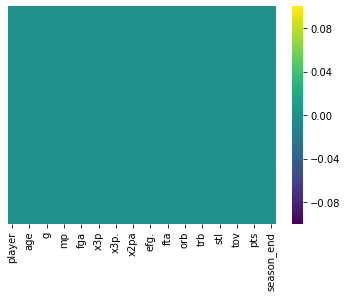

In [11]:
#Check for if null values are replaced  using heatmap
import seaborn as sns
sns.heatmap(nba.isnull(),cmap='viridis',yticklabels=False,cbar=True)
#we see no null values

# Selecting only numeric columns from the dataset

In [12]:

numeric_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
nba_numeric = nba[numeric_columns]

# Selecting only Categorical columns from the dataset

In [13]:

categorical_columns = nba[['player', 'bref_team_id', 'season']]

# Normalizing the Numeric data

In [14]:
numeric_columns_normalized=nba_numeric.apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [15]:
categorical_columns.head()
#these categories will logical not make any deffference with repect to the target column.
#Hence will not be included in our model training

,player,bref_team_id,season
0,Quincy Acy,TOT,2013-2014
1,Steven Adams,OKC,2013-2014
2,Jeff Adrien,TOT,2013-2014
3,Arron Afflalo,ORL,2013-2014
4,Alexis Ajinca,NOP,2013-2014


In [16]:
numeric_columns_normalized.head()
#data has been normalized between 0 and 1 as required

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,0.20,0.756098,0.000000,0.271067,0.077739,0.083531,0.468,0.015326,0.024390,0.266667,...,0.660,0.163636,0.183908,0.193896,0.038835,0.120419,0.118721,0.101695,0.446886,0.065947
1,0.05,0.975610,0.243902,0.383211,0.109541,0.109597,0.503,0.000000,0.000000,0.285111,...,0.581,0.322727,0.242656,0.298025,0.059639,0.209424,0.260274,0.240678,0.743590,0.102198
2,0.40,0.634146,0.146341,0.307594,0.168433,0.162915,0.520,0.000000,0.000000,0.285111,...,0.639,0.231818,0.260536,0.274686,0.052705,0.125654,0.164384,0.132203,0.395604,0.139607
3,0.45,0.878049,0.890244,0.817366,0.546525,0.598934,0.459,0.490421,0.487805,0.426667,...,0.815,0.072727,0.293742,0.235189,0.343967,0.183246,0.013699,0.494915,0.498168,0.512919
4,0.30,0.670732,0.365854,0.304390,0.160188,0.147512,0.546,0.000000,0.001626,0.000000,...,0.836,0.213636,0.233716,0.248654,0.055479,0.120419,0.210046,0.213559,0.684982,0.126494


In [17]:

nba = pd.concat([categorical_columns, numeric_columns_normalized], axis=1)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# The columns that we will be making predictions with.(Independent features)
X = nba[['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']]

# The column that we want to predict.(Dependenet feature)
y = nba["pts"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the knn model. We will use regressor because we are predicting on continous values

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics


#check for incresing neighbor values to see which has the highest regression score

for k in range(10):
    k_value=k+1
    knn=KNeighborsRegressor(n_neighbors=k_value)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print("Regression score is:",format(metrics.r2_score(y_test,y_pred),'.4f'),"for k value:",k_value)

Regression score is: 0.9145 for k value: 1
Regression score is: 0.9464 for k value: 2
Regression score is: 0.9548 for k value: 3
Regression score is: 0.9594 for k value: 4
Regression score is: 0.9583 for k value: 5
Regression score is: 0.9579 for k value: 6
Regression score is: 0.9579 for k value: 7
Regression score is: 0.9609 for k value: 8
Regression score is: 0.9576 for k value: 9
Regression score is: 0.9557 for k value: 10


# K=8, as it gives us the highest prediction score

In [22]:
knn = KNeighborsRegressor(n_neighbors = 8)
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test)

In [24]:
print("Coefficient of determination R^2 <-- on test set: {}".format(knn.score(x_test,y_test)))

Coefficient of determination R^2 <-- on test set: 0.9608709080574631


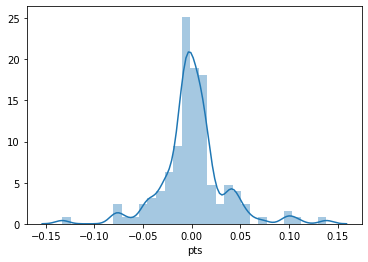

In [25]:
sns.distplot(y_test-y_pred)

Interpretation:The graph is not close to a guassian distribution curve.It looks close to like a bell curve but not completely.

Residuals

Explore the residuals to make sure everything was okay with our data.

Since it is not almost normally distributed we can say that it is not a good model.

In [27]:
#regression evaluation metrics
import numpy as np
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.02178012420708273
MSE: 0.0011143141980051975
RMSE: 0.03338134505985637


Lower values of RMSE indicate better fit